In [75]:
# A small programme to
import requests
import networkx as nx
import itertools
import xmltodict
%pylab inline 
r = requests.get('http://export.arxiv.org/api/query?search_query=all:electron')
r.text

Populating the interactive namespace from numpy and matplotlib


u'<?xml version="1.0" encoding="UTF-8"?>\n<feed xmlns="http://www.w3.org/2005/Atom">\n  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D10" rel="self" type="application/atom+xml"/>\n  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=10</title>\n  <id>http://arxiv.org/api/WyBPOs+pRgzCTXTMWhtnbcOmk6g</id>\n  <updated>2017-01-25T00:00:00-05:00</updated>\n  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">119632</opensearch:totalResults>\n  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>\n  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">10</opensearch:itemsPerPage>\n  <entry>\n    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>\n    <updated>2001-02-28T20:12:09Z</updated>\n    <published>2001-02-28T20:12:09Z</published>\n    <title>Impact of Electron-Electro

In [78]:
def search_all(term,start,stop):
    r = requests.get('http://export.arxiv.org/api/query?search_query=all:{}&start={}&max_results={}'.format(term,start,stop))
    return xmltodict.parse(r.text)

In [87]:
def search_author(author,start,stop):
    r = requests.get('http://export.arxiv.org/api/query?search_query=au:{}&start={}&max_results={}'.format(author,start,stop))
    return xmltodict.parse(r.text)

In [147]:
def get_author_list(temp):
    list_of_authors_grouped = []
    list_of_authors = []
    for entry in temp['feed']['entry']:
        temp2 = []
        for author in entry['author']:
            if type(author) is not unicode:
                temp2.append(author['name'])
                list_of_authors.append(author['name'])
        list_of_authors_grouped.append(temp2)
    return [list_of_authors,list_of_authors_grouped]    

In [148]:
def network_generation(list_of_authors):
    for element in list_of_authors:
        if len(element) > 0:
            #print(element)
            for i in element:
                G.add_node(i)
            a = list(itertools.combinations(element,2))
            for i in a:
                G.add_edge(*i)


In [160]:
#Initial seed
a = search_all('Graphene',0,100)

author_list = get_author_list(a)
#loop

for i in author_list[0]:
    b = search_author(i,'0','100')
    b = get_author_list(b)
    network_generation(b[1])
    


#b = get_author_list(a)

#network_generation(b[1])


UnicodeEncodeError: 'ascii' codec can't encode character u'\xf6' in position 5: ordinal not in range(128)

In [159]:
b

OrderedDict([(u'feed',
              OrderedDict([(u'@xmlns', u'http://www.w3.org/2005/Atom'),
                           (u'link',
                            OrderedDict([(u'@href',
                                          u'http://arxiv.org/api/query?search_query%3Dau%3AZhao%20Zhang%26id_list%3D%26start%3D0%26max_results%3D100'),
                                         (u'@rel', u'self'),
                                         (u'@type',
                                          u'application/atom+xml')])),
                           (u'title',
                            OrderedDict([(u'@type', u'html'),
                                         ('#text',
                                          u'ArXiv Query: search_query=au:Zhao Zhang&id_list=&start=0&max_results=100')])),
                           (u'id',
                            u'http://arxiv.org/api/E5cITAStOeyMJoxBi46sxea//tA'),
                           (u'updated', u'2017-01-25T00:00:00-05:00'),
                  

In [134]:
G = nx.Graph()
G.nodes()
network_generation(b)

In [135]:
G.nodes()

[u'Michihisa Yamamoto',
 u'Roy Shiloh',
 u'Chao Feng',
 u'J. C. Greer',
 u'Michele Cini',
 u'Yossi Lereah',
 u'A. Rubio',
 u'Yigal Lilach',
 u'I. Hagymasi',
 u'Kenji Kamide',
 u'Patrick Irvin',
 u'A. H. Castro Neto',
 u'Natalia Del Fatti',
 u'John C. Brown',
 u'H. Predel',
 u'Roland Bouffanais',
 u'C. Vocks',
 u'I. Karakurt',
 u'Seigo Tarucha',
 u'Jamal Berakdar',
 u'Gerhard Fasol',
 u'R. N. Gurzhi',
 u'Reza Asgari',
 u'P. Youplao',
 u'I. V. Tokatly',
 u'Jeremy Levy',
 u'Vadim Galenchik',
 u'Ignacio Franco',
 u'M. Hruska',
 u'Emile B\xe9villon',
 u'A. Saxena',
 u'Michelle Tomczyk',
 u'F Flores',
 u'Ryota Niikura',
 u'E. Dzifcakova',
 u'Z. Khas',
 u'Michele Piana',
 u'Arnab Kar',
 u'R. C. Monreal',
 u'S. Kaprzyk',
 u'P. S. Shternin',
 u'M. Saitoh',
 u'K. W. West',
 u'J. Lorenzana',
 u'Marco Polini',
 u"Roberto D'Agosta",
 u'Tristan Meunier',
 u'Tong Zhang',
 u'M. Grilli',
 u'Andrew Das Arulsamy',
 u'Shintaro Takada',
 u'K. Kral',
 u'X. Liu',
 u'M. Yu. Reizer',
 u'Ming-Su Si',
 u'Christo

In [98]:
a = search_all('electron','0','100')

In [104]:
b = get_author_list(a)

In [105]:
b

[[u'David Prendergast',
  u'M. Nolan',
  u'Claudia Filippi',
  u'Stephen Fahy',
  u'J. C. Greer'],
 [u'P. S. Shternin', u'D. G. Yakovlev'],
 [u'G. -Q. Hai', u'F. M. Peeters'],
 [u'Eduard P. Kontar',
  u'A. Gordon Emslie',
  u'Anna Maria Massone',
  u'Michele Piana',
  u'John C. Brown',
  u'Marco Prato'],
 [],
 [],
 [u'I. Karakurt', u'A. J. Dahm'],
 [u'Emile B\xe9villon',
  u'Jean-Philippe Colombier',
  u'Vanina Recoules',
  u'Razvan Stoian'],
 [u'I. Campillo',
  u'V. M. Silkin',
  u'J. M. Pitarke',
  u'E. V. Chulkov',
  u'A. Rubio',
  u'P. M. Echenique'],
 [u'Matthew D. Mower', u'G. Vignale', u'I. V. Tokatly'],
 [u'Emile B\xe9villon',
  u'Jean-Philippe Colombier',
  u'Vanina Recoules',
  u'Razvan Stoian'],
 [],
 [u'N. M. Chtchelkatchev', u'I. S. Burmistrov'],
 [],
 [u'Konstantin A. Kouzakov', u'Jamal Berakdar'],
 [],
 [u'Dmitry Pozdnyakov', u'Vadim Galenchik'],
 [],
 [],
 [u'James W. Dufty',
  u'Ilya V. Pogorelov',
  u'Bernard Talin',
  u'Annette Calisti'],
 [u'Hirofumi Yanagisawa',
  

In [88]:
b = search_author('J. H. Lloyd-Williams','0','100')

In [96]:
b['feed']['entry'][0]

OrderedDict([(u'id', u'http://arxiv.org/abs/1204.0097v1'),
             (u'updated', u'2012-03-31T12:51:27Z'),
             (u'published', u'2012-03-31T12:51:27Z'),
             (u'title',
              u'Kinetic Monte Carlo simulations inspired by epitaxial graphene growth'),
             (u'summary',
              u'Graphene, a flat monolayer of carbon atoms packed tightly into a two\ndimensional hexagonal lattice, has unusual electronic properties which have\nmany promising nanoelectronic applications. Recent Low Energy Electron\nMicroscopy (LEEM) experiments show that the step edge velocity of epitaxially\ngrown 2D graphene islands on Ru(0001) varies with the fifth power of the\nsupersaturation of carbon adatoms. This suggests that graphene islands grow by\nthe addition of clusters of five atoms rather than by the usual mechanism of\nsingle adatom attachment.\n  We have carried out Kinetic Monte Carlo (KMC) simulations in order to further\ninvestigate the general scenario of epitax

In [8]:
import xmltodict


In [9]:
temp = xmltodict.parse(r.text)

In [10]:
temp['feed'].keys()

[u'@xmlns',
 u'link',
 u'title',
 u'id',
 u'updated',
 u'opensearch:totalResults',
 u'opensearch:startIndex',
 u'opensearch:itemsPerPage',
 u'entry']

In [11]:
temp['feed']['entry'][1].keys()

[u'id',
 u'updated',
 u'published',
 u'title',
 u'summary',
 u'author',
 u'arxiv:doi',
 u'link',
 u'arxiv:comment',
 u'arxiv:journal_ref',
 u'arxiv:primary_category',
 u'category']

In [12]:
temp['feed']['entry'][1]['author'][1]['name']

u'D. G. Yakovlev'

In [13]:
list_of_authors = []
temp2 = []

In [14]:
for entry in temp['feed']['entry']:
#    print(entry)
    temp2 = []
    for author in entry['author']:
        #print(len(author))
        #print(type(author))
        #print(author)
        if type(author) is not unicode:
            #print('success')
            temp2.append(author['name'])
    list_of_authors.append(temp2)

In [26]:
list_of_authors

[[u'David Prendergast',
  u'M. Nolan',
  u'Claudia Filippi',
  u'Stephen Fahy',
  u'J. C. Greer'],
 [u'P. S. Shternin', u'D. G. Yakovlev'],
 [u'G. -Q. Hai', u'F. M. Peeters'],
 [u'Eduard P. Kontar',
  u'A. Gordon Emslie',
  u'Anna Maria Massone',
  u'Michele Piana',
  u'John C. Brown',
  u'Marco Prato'],
 [],
 [],
 [u'I. Karakurt', u'A. J. Dahm'],
 [u'Emile B\xe9villon',
  u'Jean-Philippe Colombier',
  u'Vanina Recoules',
  u'Razvan Stoian'],
 [u'I. Campillo',
  u'V. M. Silkin',
  u'J. M. Pitarke',
  u'E. V. Chulkov',
  u'A. Rubio',
  u'P. M. Echenique'],
 [u'Matthew D. Mower', u'G. Vignale', u'I. V. Tokatly']]

In [16]:
for i in list_of_authors:
    print(i,type(i))

([u'David Prendergast', u'M. Nolan', u'Claudia Filippi', u'Stephen Fahy', u'J. C. Greer'], <type 'list'>)
([u'P. S. Shternin', u'D. G. Yakovlev'], <type 'list'>)
([u'G. -Q. Hai', u'F. M. Peeters'], <type 'list'>)
([u'Eduard P. Kontar', u'A. Gordon Emslie', u'Anna Maria Massone', u'Michele Piana', u'John C. Brown', u'Marco Prato'], <type 'list'>)
([], <type 'list'>)
([], <type 'list'>)
([u'I. Karakurt', u'A. J. Dahm'], <type 'list'>)
([u'Emile B\xe9villon', u'Jean-Philippe Colombier', u'Vanina Recoules', u'Razvan Stoian'], <type 'list'>)
([u'I. Campillo', u'V. M. Silkin', u'J. M. Pitarke', u'E. V. Chulkov', u'A. Rubio', u'P. M. Echenique'], <type 'list'>)
([u'Matthew D. Mower', u'G. Vignale', u'I. V. Tokatly'], <type 'list'>)


In [18]:
list_of_authors[0]

[u'David Prendergast',
 u'M. Nolan',
 u'Claudia Filippi',
 u'Stephen Fahy',
 u'J. C. Greer']

In [20]:
type(list_of_authors[4]) is not unicode 

True

In [28]:
G = nx.Graph()

In [64]:


for element in list_of_authors:
    if len(element) > 0:
        #print(element)
        for i in element:
            G.add_node(i)
        a = list(itertools.combinations(element,2))
        for i in a:
            G.add_edge(*i)
            

In [66]:
G.edges()

[(u'J. C. Greer', u'Claudia Filippi'),
 (u'J. C. Greer', u'M. Nolan'),
 (u'J. C. Greer', u'David Prendergast'),
 (u'J. C. Greer', u'Stephen Fahy'),
 (u'Anna Maria Massone', u'Michele Piana'),
 (u'Anna Maria Massone', u'Marco Prato'),
 (u'Anna Maria Massone', u'Eduard P. Kontar'),
 (u'Anna Maria Massone', u'A. Gordon Emslie'),
 (u'Anna Maria Massone', u'John C. Brown'),
 (u'A. Rubio', u'E. V. Chulkov'),
 (u'A. Rubio', u'J. M. Pitarke'),
 (u'A. Rubio', u'I. Campillo'),
 (u'A. Rubio', u'V. M. Silkin'),
 (u'A. Rubio', u'P. M. Echenique'),
 (u'Stephen Fahy', u'Claudia Filippi'),
 (u'Stephen Fahy', u'M. Nolan'),
 (u'Stephen Fahy', u'David Prendergast'),
 (u'John C. Brown', u'Michele Piana'),
 (u'John C. Brown', u'Eduard P. Kontar'),
 (u'John C. Brown', u'A. Gordon Emslie'),
 (u'John C. Brown', u'Marco Prato'),
 (u'P. M. Echenique', u'E. V. Chulkov'),
 (u'P. M. Echenique', u'J. M. Pitarke'),
 (u'P. M. Echenique', u'I. Campillo'),
 (u'P. M. Echenique', u'V. M. Silkin'),
 (u'Jean-Philippe Colom

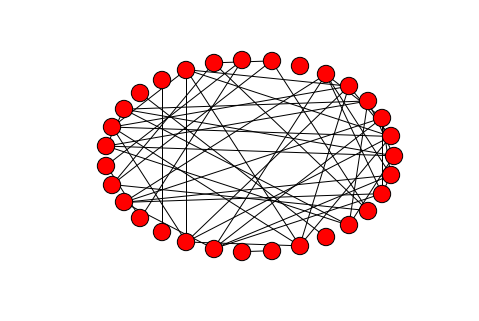

In [72]:
nx.draw(G,pos=nx.nx.circular_layout(G))

In [88]:
for i in list_of_authors:
    print(type(i) == list)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True


In [33]:
fir 

[(u'David Prendergast',),
 (u'M. Nolan',),
 (u'Claudia Filippi',),
 (u'Stephen Fahy',),
 (u'J. C. Greer',)]

In [36]:
for i,k in pairwise(list_of_authors[0]):
    print(i,k)

NameError: name 'pairwise' is not defined

In [38]:
import itertools

In [52]:
a = list(itertools.combinations(list_of_authors[0],2))

In [53]:
a

[(u'David Prendergast', u'M. Nolan'),
 (u'David Prendergast', u'Claudia Filippi'),
 (u'David Prendergast', u'Stephen Fahy'),
 (u'David Prendergast', u'J. C. Greer'),
 (u'M. Nolan', u'Claudia Filippi'),
 (u'M. Nolan', u'Stephen Fahy'),
 (u'M. Nolan', u'J. C. Greer'),
 (u'Claudia Filippi', u'Stephen Fahy'),
 (u'Claudia Filippi', u'J. C. Greer'),
 (u'Stephen Fahy', u'J. C. Greer')]

In [54]:
G.add_node(a[0])

In [56]:
G.nodes()

[(u'David Prendergast', u'M. Nolan')]

In [44]:
iterable = range(10)
for s in xrange(len(iterable)+1):
    for comb in itertools.combinations(iterable, s):
        yield comb

SyntaxError: 'yield' outside function (<ipython-input-44-75b84ff704de>, line 4)

In [76]:
a = '{} is a {}'.format('This','test')

In [77]:
a

'This is a test'

In [127]:
G = nx.Graph()

print(G.nodes())
def add_to_a():
    G.add_node(1)
    
add_to_a()    
print(G.nodes())
    

[]
[1]


In [116]:
G.add_node(1)

In [123]:
G.nodes()

[]

In [ ]:
!pwd